# 1. Leitura do arquivo

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files

# Faça o upload do arquivo corpus.txt
fazer_upload = files.upload()

# Leitura do arquivo
file_path = 'corpus.txt'
df = pd.read_csv(file_path, sep='\t', header=0)

df.head()

Saving corpus.txt to corpus.txt


,Rafael,Joao,Bia,Giovana,Caio,Henrique
0,@neymar,@neymar,@Beyonce,@ProfCaio,@profRafael,@ProfCaio
1,@LuanSantana,@LuanSantana,@DorivalJr,@ProfDouglas,@profHenrique,@profHenrique
2,@Pericles,@Pericles,@FDiniz,@profHenrique,@Unimar,@profRafael
3,@ProfCaio,@ProfCaio,@Cr7,@Unimar,@Unesp,@Unimar
4,@ProfDouglas,@ProfDouglas,@Messi,@Unesp,@Anitta,@Unesp


# 2. Conversão do conteúdo em uma estrutura adequada

In [2]:
# Transformando em uma lista de listas
corpus = df.values.tolist()
print(corpus)

[['@neymar', '@neymar', '@Beyonce', '@ProfCaio', '@profRafael', '@ProfCaio'], ['@LuanSantana', '@LuanSantana', '@DorivalJr', '@ProfDouglas', '@profHenrique', '@profHenrique'], ['@Pericles', '@Pericles', '@FDiniz', '@profHenrique', '@Unimar', '@profRafael'], ['@ProfCaio', '@ProfCaio', '@Cr7', '@Unimar', '@Unesp', '@Unimar'], ['@ProfDouglas', '@ProfDouglas', '@Messi', '@Unesp', '@Anitta', '@Unesp'], ['@profHenrique', '@profHenrique', '@LebronJames', '@Anitta', '@Rihana', '@Anitta'], ['@Unimar', '@Unimar', '@PaulMcCartney', '@Rihana', '@Beyonce', '@Rihana'], ['@Unesp', '@Unesp', '@profRafael', '@Beyonce', '@Cr7', '@Beyonce'], ['@Anitta', '@Anitta', nan, '@Cr7', '@Messi', '@Cr7'], ['@Rihana', '@Rihana', nan, '@Messi', '@LebronJames', '@Messi'], ['@Beyonce', '@Beyonce', nan, '@LebronJames', nan, '@LebronJames'], ['@DorivalJr', '@DorivalJr', nan, '@PaulMcCartney', nan, nan], ['@FDiniz', '@FDiniz', nan, '@profRafael', nan, nan], ['@Cr7', '@profRafael', nan, nan, nan, nan], ['@Messi', nan, nan

# 3. Geração das matrizes de incidência, similaridade e coocorrência

Matriz de Incidência

In [3]:
# Pegando os nomes das colunas
nomes_colunas = df.columns

# Convertendo para uma lista
pessoas = df.columns.tolist()
print(pessoas)

# Criando um dicionário para mapear usuários para índices
pessoa_indice = {usuario: i for i, usuario in enumerate(pessoas)}
print(pessoa_indice)

['Rafael', 'Joao', 'Bia', 'Giovana', 'Caio', 'Henrique']
{'Rafael': 0, 'Joao': 1, 'Bia': 2, 'Giovana': 3, 'Caio': 4, 'Henrique': 5}


In [4]:
# Pegando as celebridades
celebridades = []
for sublist in corpus:
  for celebridade in sublist:
    if pd.notna(celebridade):
      celebridades.append(celebridade)
celebridades = sorted(set(celebridades))
print(celebridades)


['@Anitta', '@Beyonce', '@Cr7', '@DorivalJr', '@FDiniz', '@LebronJames', '@LuanSantana', '@Messi', '@PaulMcCartney', '@Pericles', '@ProfCaio', '@ProfDouglas', '@Rihana', '@Unesp', '@Unimar', '@neymar', '@profHenrique', '@profRafael']


In [5]:
# Criando a matriz incidencia:
matriz_incidencia = np.zeros((len(pessoas), len(celebridades)),dtype=int)

# Atribuindo dados a matriz
for linha, pessoa in enumerate(pessoas):
  for coluna, celebridade in enumerate(celebridades):
    if celebridade in df[pessoa].values:
      matriz_incidencia[linha][coluna] = 1
    else:
      matriz_incidencia[linha][coluna] = 0

print(matriz_incidencia)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1]
 [1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1]
 [1 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1]
 [1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1]]


Matriz de Similaridade

In [6]:
# Matriz de similaridade (produto interno da matriz de incidência)
matriz_similaridade = np.dot(matriz_incidencia, matriz_incidencia.T)

# Atribuir 0 na diag principal
np.fill_diagonal(matriz_similaridade, 0)

# Exibindo a matriz de similaridade
print(matriz_similaridade)

[[ 0 13  7 12  9 10]
 [13  0  4  9  7  8]
 [ 7  4  0  6  5  5]
 [12  9  6  0 10 11]
 [ 9  7  5 10  0 10]
 [10  8  5 11 10  0]]


Matriz de Coocorrência

In [7]:
# Mmatriz coocorrencia
matriz_coocorrencia = np.dot(matriz_incidencia.T, matriz_incidencia)

# Atribuindo 0 à diagonal principal
np.fill_diagonal(matriz_coocorrencia, 0)

# Exibindo a matriz de coocorrência
print(matriz_coocorrencia)

[[0 5 4 2 2 4 2 4 2 2 4 3 5 5 5 2 5 4]
 [5 0 5 3 3 5 2 5 3 2 4 3 5 5 5 2 5 5]
 [4 5 0 2 2 5 1 5 3 1 3 2 4 4 4 1 4 4]
 [2 3 2 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [2 3 2 3 0 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [4 5 5 2 2 0 1 5 3 1 3 2 4 4 4 1 4 4]
 [2 2 1 2 2 1 0 1 1 2 2 2 2 2 2 2 2 1]
 [4 5 5 2 2 5 1 0 3 1 3 2 4 4 4 1 4 4]
 [2 3 3 2 2 3 1 3 0 1 2 2 2 2 2 1 2 2]
 [2 2 1 2 2 1 2 1 1 0 2 2 2 2 2 2 2 1]
 [4 4 3 2 2 3 2 3 2 2 0 3 4 4 4 2 4 3]
 [3 3 2 2 2 2 2 2 2 2 3 0 3 3 3 2 3 2]
 [5 5 4 2 2 4 2 4 2 2 4 3 0 5 5 2 5 4]
 [5 5 4 2 2 4 2 4 2 2 4 3 5 0 5 2 5 4]
 [5 5 4 2 2 4 2 4 2 2 4 3 5 5 0 2 5 4]
 [2 2 1 2 2 1 2 1 1 2 2 2 2 2 2 0 2 1]
 [5 5 4 2 2 4 2 4 2 2 4 3 5 5 5 2 0 4]
 [4 5 4 2 2 4 1 4 2 1 3 2 4 4 4 1 4 0]]


# 4. Construção e visualização dos grafos

# Grafo de Incidência + Métricas topológicas

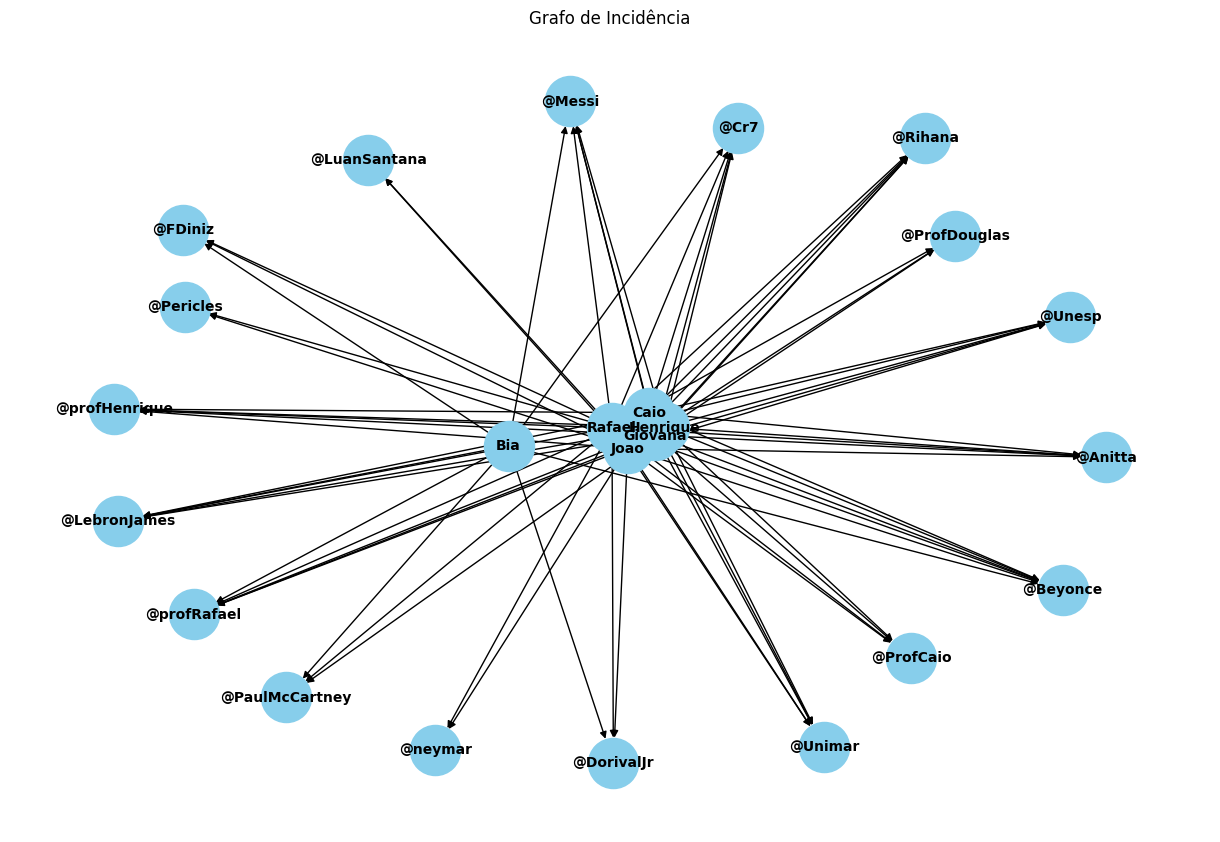

Os graus dos vértices são: {'Rafael': 17, 'Joao': 14, 'Bia': 8, 'Giovana': 13, 'Caio': 10, 'Henrique': 11, '@Anitta': 5, '@Beyonce': 6, '@Cr7': 5, '@DorivalJr': 3, '@FDiniz': 3, '@LebronJames': 5, '@LuanSantana': 2, '@Messi': 5, '@PaulMcCartney': 3, '@Pericles': 2, '@ProfCaio': 4, '@ProfDouglas': 3, '@Rihana': 5, '@Unesp': 5, '@Unimar': 5, '@neymar': 2, '@profHenrique': 5, '@profRafael': 5}
O grau médio é 6.08
Os vértices são: ['Rafael', 'Joao', 'Bia', 'Giovana', 'Caio', 'Henrique', '@Anitta', '@Beyonce', '@Cr7', '@DorivalJr', '@FDiniz', '@LebronJames', '@LuanSantana', '@Messi', '@PaulMcCartney', '@Pericles', '@ProfCaio', '@ProfDouglas', '@Rihana', '@Unesp', '@Unimar', '@neymar', '@profHenrique', '@profRafael']
O Grafo possui 24 vertices, 73 arestas e suas ligações são: [('Rafael', '@Anitta'), ('Rafael', '@Beyonce'), ('Rafael', '@Cr7'), ('Rafael', '@DorivalJr'), ('Rafael', '@FDiniz'), ('Rafael', '@LebronJames'), ('Rafael', '@LuanSantana'), ('Rafael', '@Messi'), ('Rafael', '@PaulMcCartn

In [8]:
# Construindo o grafo de incidência
G_incidencia = nx.DiGraph()

# Adicionando nós para usuários
for pessoa in pessoas:
  G_incidencia.add_node(pessoa, bipartite=0)

# Adicionando nós para celebridades
for celebridade in celebridades:
  G_incidencia.add_node(celebridade, bipartite=1) # 1 pois os nós de celebridades se conectaram ao nós dos usuários (0)

# Adicionando arestas entre pessoas e celebridades
for linha, pessoa in enumerate(pessoas):
  for coluna, celebridade in enumerate(celebridades):
    if celebridade in df[pessoa].values:
      G_incidencia.add_edge(pessoa, celebridade)

# G_incidencia.add_edge(usuario, pessoa)

# Desenhando o grafo de incidência
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G_incidencia)  # Layout do grafo
nx.draw(G_incidencia, pos, with_labels=True, node_size=1300, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Grafo de Incidência')
plt.show()


inf = G_incidencia

numero_vertice = inf.number_of_nodes()
numero_arestas = inf.number_of_edges()
ligacoes = list(inf.edges(data=False))
nomes_vertices = list(inf.nodes)
graus = inf.degree()
acumuladora = sum(dict(graus).values())

print(f"Os graus dos vértices são: {dict(graus)}")
print(f"O grau médio é {acumuladora / inf.number_of_nodes():.2f}")
print(f"Os vértices são: {nomes_vertices}")
print(f"O Grafo possui {numero_vertice} vertices, {numero_arestas} arestas e suas ligações são: {ligacoes}.")
print("Os pesos das arestas são:")
for u, v, wt in inf.edges(data='weight'):
    wt=1
    print(f"({u} -> {v}, peso: {wt})")
contapeso = 0
for p in inf.edges():
  contapeso += wt
print(f"A força de conectividade média é: {contapeso / numero_arestas}")
densidade = (2 * len(ligacoes)) / (numero_vertice * (numero_vertice - 1)) if numero_vertice > 1 else 0
print(f"O grafo possui densidade = {densidade:.2f}")

# Grafo de Similaridade + Métricas topológicas

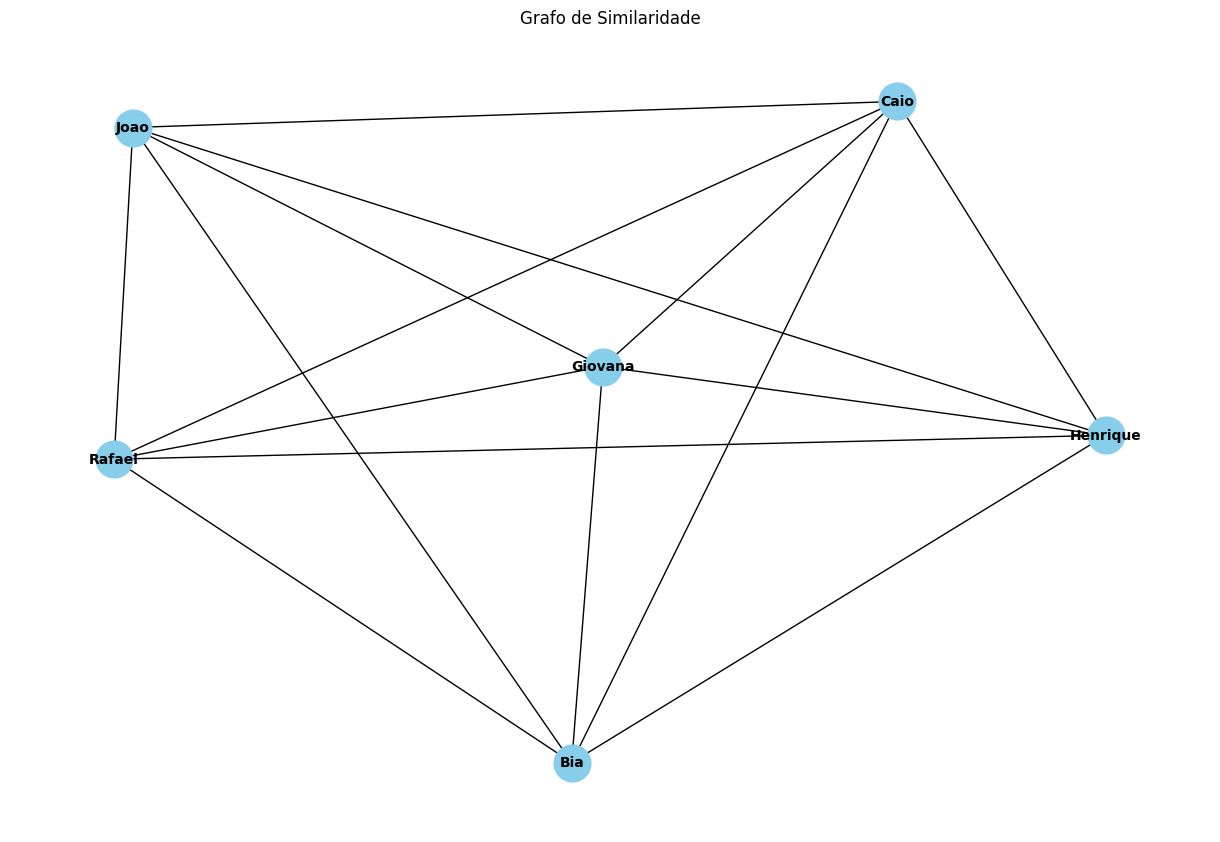

Os graus dos vértices são: {'Rafael': 5, 'Joao': 5, 'Bia': 5, 'Giovana': 5, 'Caio': 5, 'Henrique': 5}
O grau médio é 5.00
Os vértices são: ['Rafael', 'Joao', 'Bia', 'Giovana', 'Caio', 'Henrique']
O Grafo possui 6 vertices, 15 arestas e suas ligações são: [('Rafael', 'Joao'), ('Rafael', 'Bia'), ('Rafael', 'Giovana'), ('Rafael', 'Caio'), ('Rafael', 'Henrique'), ('Joao', 'Bia'), ('Joao', 'Giovana'), ('Joao', 'Caio'), ('Joao', 'Henrique'), ('Bia', 'Giovana'), ('Bia', 'Caio'), ('Bia', 'Henrique'), ('Giovana', 'Caio'), ('Giovana', 'Henrique'), ('Caio', 'Henrique')].
Os pesos das arestas são:
(Rafael -> Joao, peso: 13)
(Rafael -> Bia, peso: 7)
(Rafael -> Giovana, peso: 12)
(Rafael -> Caio, peso: 9)
(Rafael -> Henrique, peso: 10)
(Joao -> Bia, peso: 4)
(Joao -> Giovana, peso: 9)
(Joao -> Caio, peso: 7)
(Joao -> Henrique, peso: 8)
(Bia -> Giovana, peso: 6)
(Bia -> Caio, peso: 5)
(Bia -> Henrique, peso: 5)
(Giovana -> Caio, peso: 10)
(Giovana -> Henrique, peso: 11)
(Caio -> Henrique, peso: 10)
A

In [9]:
# Construindo o grafo de similaridade
G_similaridade = nx.Graph()
for i in range(len(pessoas)):
    for j in range(i + 1, len(pessoas)):
        if matriz_similaridade[i, j] > 0:
            G_similaridade.add_edge(pessoas[i], pessoas[j], weight=(matriz_similaridade[i,j]))

# Desenhando o grafo de similaridade
plt.figure(figsize=(12, 8))
nx.draw(G_similaridade, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Grafo de Similaridade')
plt.show()


inf = G_similaridade

numero_vertice = inf.number_of_nodes()
numero_arestas = inf.number_of_edges()
ligacoes = list(inf.edges(data=False))
nomes_vertices = list(inf.nodes)
graus = inf.degree()
acumuladora = sum(dict(graus).values())

print(f"Os graus dos vértices são: {dict(graus)}")
print(f"O grau médio é {acumuladora / inf.number_of_nodes():.2f}")
print(f"Os vértices são: {nomes_vertices}")
print(f"O Grafo possui {numero_vertice} vertices, {numero_arestas} arestas e suas ligações são: {ligacoes}.")
print("Os pesos das arestas são:")
for u, v, wt in inf.edges(data='weight'):
    print(f"({u} -> {v}, peso: {wt})")
contapeso = 0
for p in inf.edges():
  contapeso += wt
print(f"A força de conectividade média é: {contapeso / numero_arestas}")
densidade = (2 * len(ligacoes)) / (numero_vertice * (numero_vertice - 1)) if numero_vertice > 1 else 0
print(f"O grafo possui densidade = {densidade:.2f}")

# Grafo de Coocorrência + Métricas Topológicas

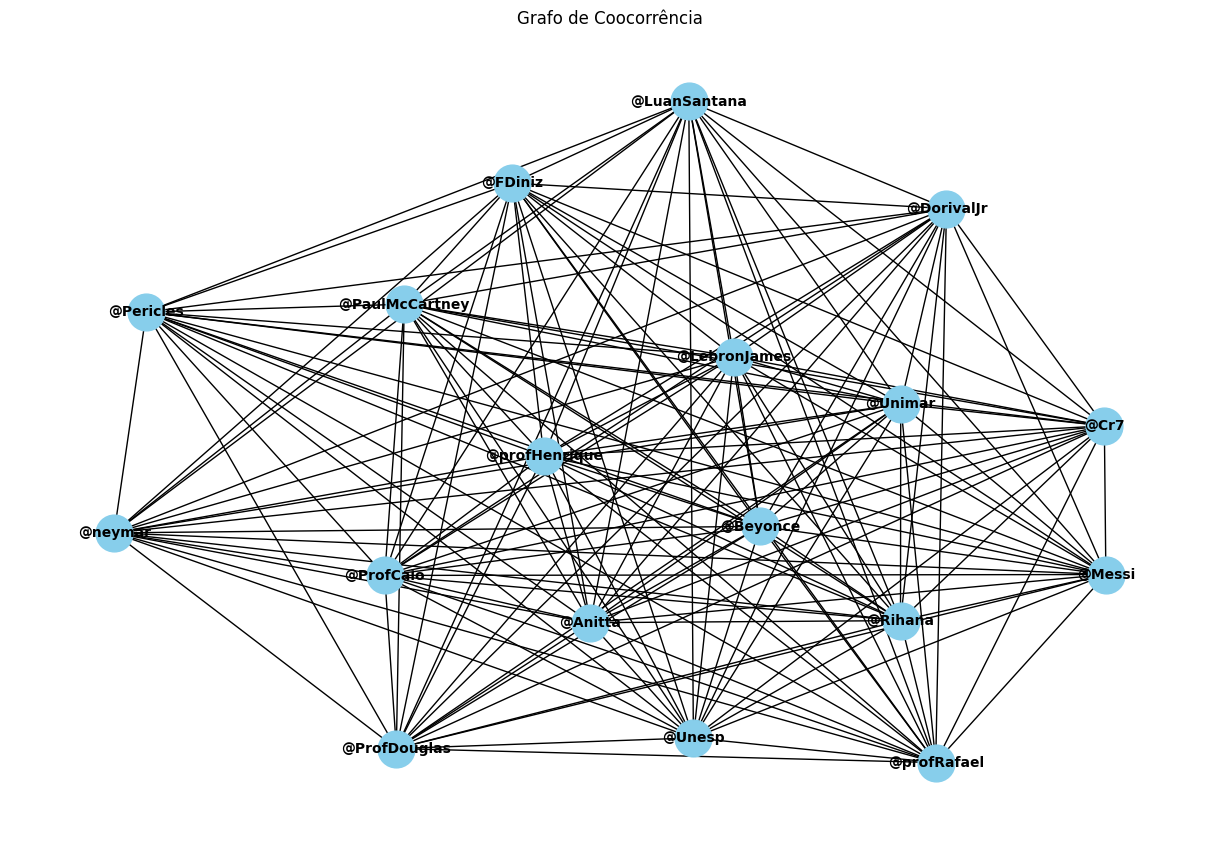

Os graus dos vértices são: {'@Anitta': 17, '@Beyonce': 17, '@Cr7': 17, '@DorivalJr': 17, '@FDiniz': 17, '@LebronJames': 17, '@LuanSantana': 17, '@Messi': 17, '@PaulMcCartney': 17, '@Pericles': 17, '@ProfCaio': 17, '@ProfDouglas': 17, '@Rihana': 17, '@Unesp': 17, '@Unimar': 17, '@neymar': 17, '@profHenrique': 17, '@profRafael': 17}
O grau médio é 17.00
Os vértices são: ['@Anitta', '@Beyonce', '@Cr7', '@DorivalJr', '@FDiniz', '@LebronJames', '@LuanSantana', '@Messi', '@PaulMcCartney', '@Pericles', '@ProfCaio', '@ProfDouglas', '@Rihana', '@Unesp', '@Unimar', '@neymar', '@profHenrique', '@profRafael']
O Grafo possui 18 vertices, 153 arestas e suas ligações são: [('@Anitta', '@Beyonce'), ('@Anitta', '@Cr7'), ('@Anitta', '@DorivalJr'), ('@Anitta', '@FDiniz'), ('@Anitta', '@LebronJames'), ('@Anitta', '@LuanSantana'), ('@Anitta', '@Messi'), ('@Anitta', '@PaulMcCartney'), ('@Anitta', '@Pericles'), ('@Anitta', '@ProfCaio'), ('@Anitta', '@ProfDouglas'), ('@Anitta', '@Rihana'), ('@Anitta', '@Unesp

In [10]:
# Construindo o grafo de coocorrência
G_coocorrencia = nx.Graph()
for i in range(len(celebridades)):
    for j in range(i + 1, len(celebridades)):
        if matriz_coocorrencia[i, j] > 0:
            G_coocorrencia.add_edge(celebridades[i], celebridades[j], weight=matriz_coocorrencia[i, j])

# Desenhando o grafo de coocorrência
plt.figure(figsize=(12, 8))
nx.draw(G_coocorrencia, with_labels=True, node_size=700, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Grafo de Coocorrência')
plt.show()


inf = G_coocorrencia

numero_vertice = inf.number_of_nodes()
numero_arestas = inf.number_of_edges()
ligacoes = list(inf.edges(data=False))
nomes_vertices = list(inf.nodes)
graus = inf.degree()
acumuladora = sum(dict(graus).values())

print(f"Os graus dos vértices são: {dict(graus)}")
print(f"O grau médio é {acumuladora / inf.number_of_nodes():.2f}")
print(f"Os vértices são: {nomes_vertices}")
print(f"O Grafo possui {numero_vertice} vertices, {numero_arestas} arestas e suas ligações são: {ligacoes}.")
print("Os pesos das arestas são:")
for u, v, wt in inf.edges(data='weight'):
    print(f"({u} -> {v}, peso: {wt})")
contapeso = 0
for p in inf.edges():
  contapeso += wt
print(f"A força de conectividade média é: {contapeso / numero_arestas}")
densidade = (2 * len(ligacoes)) / (numero_vertice * (numero_vertice - 1)) if numero_vertice > 1 else 0
print(f"O grafo possui densidade = {densidade:.2f}")